In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne_icalabel import label_components
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
original_data = scio.loadmat("data/P300S01.mat")

In [3]:
samples = original_data['samples'].transpose()


In [4]:
ch_names = ['FZ', 'CZ', 'P3', 'PZ', 'P4', 'PO7', 'PO8', 'OZ']
sfreq = 250
info = mne.create_info(ch_names, sfreq)
raw = mne.io.RawArray(samples, info)

Creating RawArray with float64 data, n_channels=8, n_times=358372
    Range : 0 ... 358371 =      0.000 ...  1433.484 secs
Ready.


Using matplotlib as 2D backend.


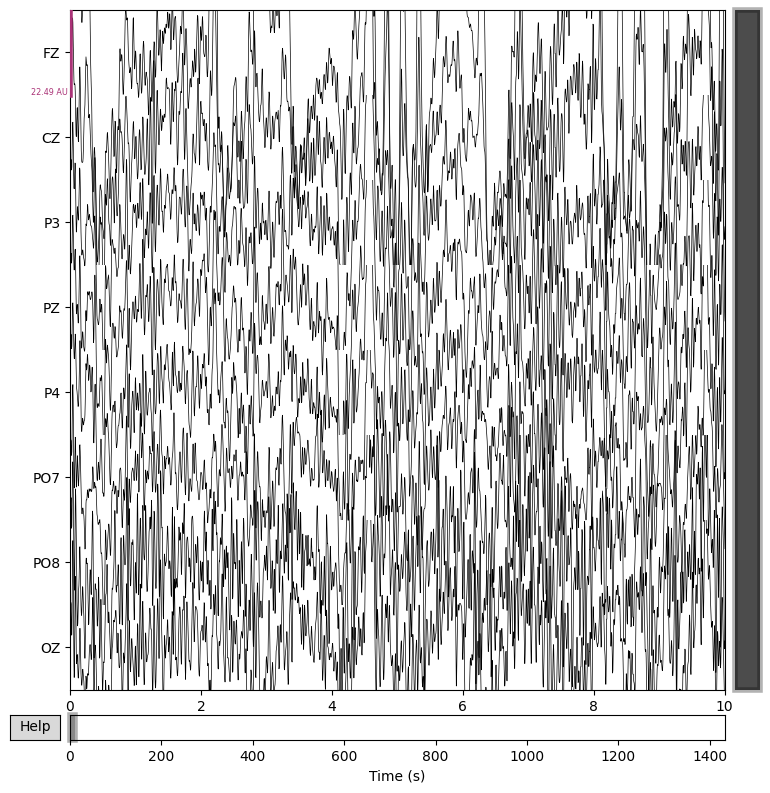

In [5]:
raw.plot()
plt.pause(0)


In [6]:
inside_data = original_data['data']
# print(inside_data.dtype)
# np.set_printoptions(threshold=np.inf)
# print(inside_data['flash'][0][0])


In [15]:
flash = inside_data['flash'][0][0]


In [16]:

# 创建注释
onset = flash[:, 0] / 250


In [17]:
description = flash[:, 3]


In [18]:
annot = mne.Annotations(onset=onset, duration=0.125, description=description)


In [19]:
# print(annot)
raw.set_annotations(annot)


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,8 misc
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [20]:
# print(samples.shape)
raw_train = raw.copy()
raw_test = raw.copy()


In [21]:
raw_train.crop(tmin=200, tmax=500)
raw_test.crop(tmin=500, tmax=800)


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,8 misc
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


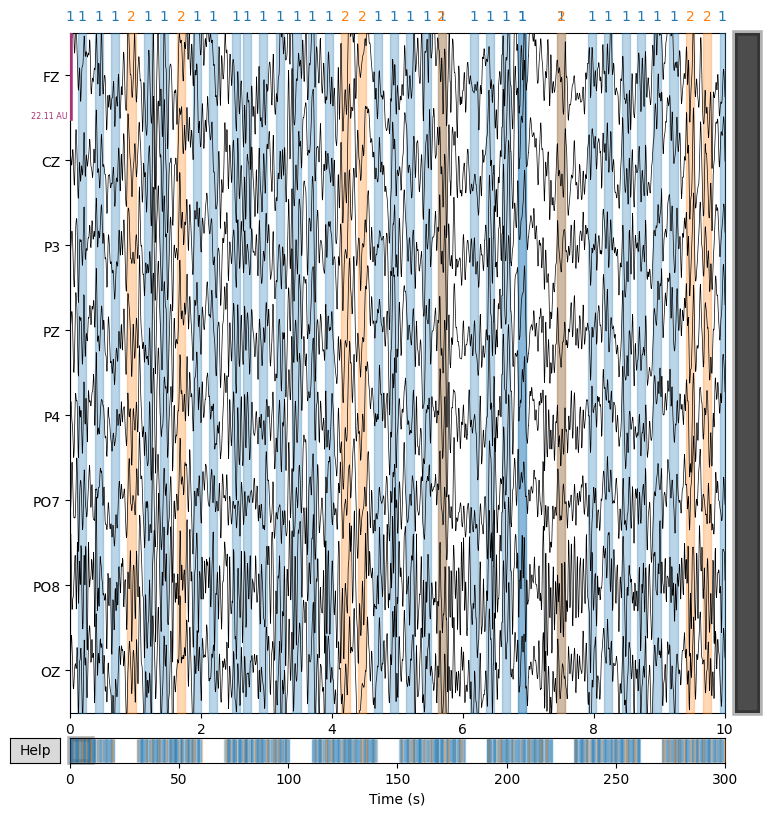

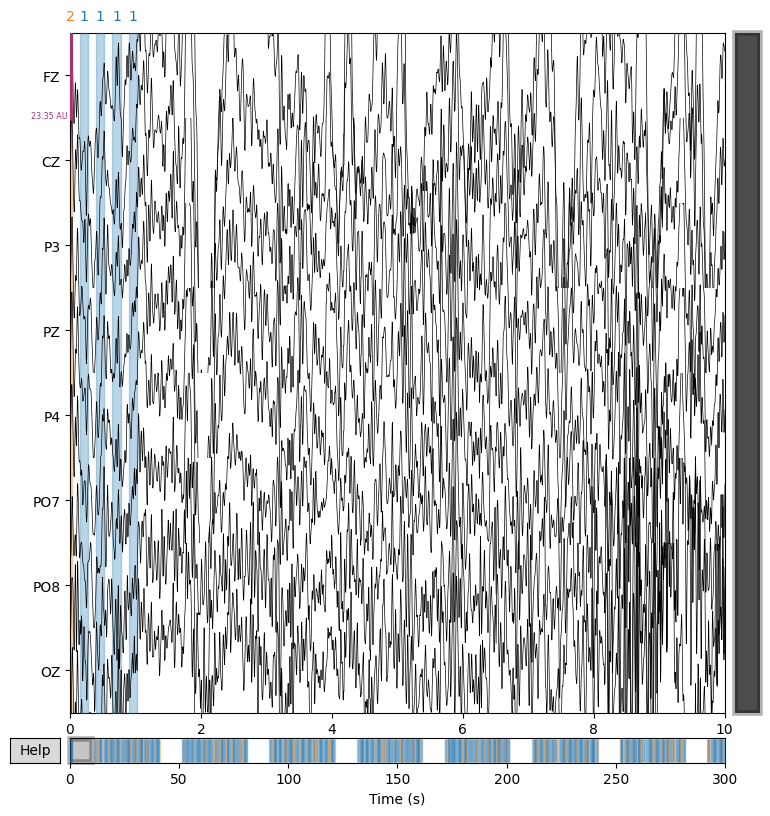

In [23]:
raw_train.plot()
raw_test.plot()
plt.pause(0)
